In [1]:
import pandas as pd

df = pd.read_csv("SMSSpamCollection", delimiter = '\t')

In [2]:
df = df.iloc[:, [1, 0]]
df.columns = ["Data", "Label"]

df.head()

,Data,Label
0,Ok lar... Joking wif u oni...,ham
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam
2,U dun say so early hor... U c already then say...,ham
3,"Nah I don't think he goes to usf, he lives aro...",ham
4,FreeMsg Hey there darling it's been 3 week's n...,spam


In [3]:
df.to_csv("Dataset.csv", index = False)

In [4]:
df = pd.read_csv("Dataset.csv")
df

,Data,Label
0,Ok lar... Joking wif u oni...,ham
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam
2,U dun say so early hor... U c already then say...,ham
3,"Nah I don't think he goes to usf, he lives aro...",ham
4,FreeMsg Hey there darling it's been 3 week's n...,spam
...,...,...
5566,This is the 2nd time we have tried 2 contact u...,spam
5567,Will ü b going to esplanade fr home?,ham
5568,"Pity, * was in mood for that. So...any other s...",ham
5569,The guy did some bitching but I acted like i'd...,ham


In [5]:
import re

def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text

df["Data"] = df["Data"].apply(clean_text)
df.head()

,Data,Label
0,ok lar joking wif u oni,ham
1,free entry in 2 a wkly comp to win fa cup fina...,spam
2,u dun say so early hor u c already then say,ham
3,nah i don t think he goes to usf he lives arou...,ham
4,freemsg hey there darling it s been 3 week s n...,spam


In [6]:
df["Label"] = df["Label"].map({'spam': 1, 'ham': 0})
df.head()

,Data,Label
0,ok lar joking wif u oni,0
1,free entry in 2 a wkly comp to win fa cup fina...,1
2,u dun say so early hor u c already then say,0
3,nah i don t think he goes to usf he lives arou...,0
4,freemsg hey there darling it s been 3 week s n...,1


In [7]:
df['Label'].value_counts()

Label
0    4824
1     747
Name: count, dtype: int64

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

tfidf = TfidfVectorizer(max_features = 5000)
x_tfidf = tfidf.fit_transform(df["Data"])

smote = SMOTE(random_state = 42)
x_upsample, y_upsample = smote.fit_resample(x_tfidf, df['Label'])

df_upsampled = pd.DataFrame(x_upsample.toarray(), columns = tfidf.get_feature_names_out())
df_upsampled['Label'] = y_upsample

df_upsampled.head()

c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


,00,000,008704050406,01223585334,02,0207,02073162414,021,03,04,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [9]:
df_upsampled['Label'].value_counts()

Label
0    4824
1    4824
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

x = df_upsampled.drop('Label', axis = 1)
y = df_upsampled['Label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

nb = MultinomialNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9797927461139896
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       975
           1       0.98      0.98      0.98       955

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



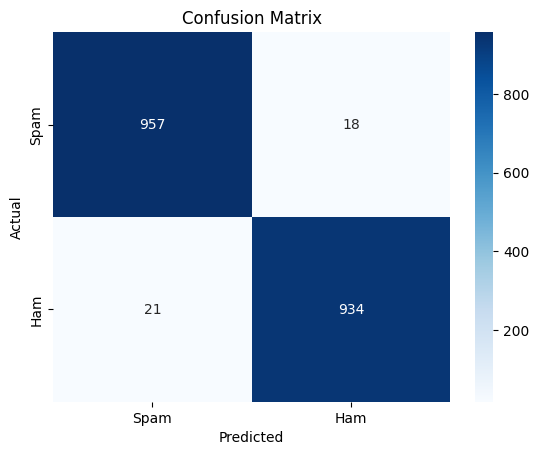

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels = ['Spam', 'Ham'], yticklabels = ['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
import pickle

with open('spam_model.pkl', 'wb') as model_file:
    pickle.dump(nb, model_file)
    
with open('spam_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

In [20]:
with open('spam_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
    
with open('spam_vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf = pickle.load(vectorizer_file)

test_emails = [
    "Congratulations! You've won a $1000 Amazon gift card. Click here to claim your prize.",
    "Hi John, Just checking in to see how the project is going. Let me know if you need any assistance.",
    "Urgent! Your bank account has been compromised. Please log in immediately to secure your account.",
    "Your subscription to the newsletter has been successfully renewed. Thank you for being a valued customer!"
]

test_emails_tfidf = tfidf.transform(test_emails)
predictions = model.predict(test_emails_tfidf)

for email, label in zip(test_emails, predictions):
    print(f"Email: {email}\n Predicted Label: {'Spam' if label == 1 else 'Ham'}\n" )


Email: Congratulations! You've won a $1000 Amazon gift card. Click here to claim your prize.
 Predicted Label: Spam

Email: Hi John, Just checking in to see how the project is going. Let me know if you need any assistance.
 Predicted Label: Ham

Email: Urgent! Your bank account has been compromised. Please log in immediately to secure your account.
 Predicted Label: Spam

Email: Your subscription to the newsletter has been successfully renewed. Thank you for being a valued customer!
 Predicted Label: Spam

